## Import libaries

In [1]:
import numpy as np
import math
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

## Reading the data

When reading the data, ensure that the '.csv' file is in the same location where your jupyter notebook is used. This way the files are organized and easy to read using the pandas library.

In [2]:
## Reading the data and removing columns that are not important.
## It reads the CSV file, removes unnecessary columns, and stores the cleaned data into a Pandas DataFrame for further processing.
df = pd.read_csv("amazon-review-dataset.csv", sep = ',', encoding = 'latin-1', usecols = lambda col: col not in ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"])

In [3]:
# print head of data frame with help of head function
df.head()

,review_id,text,verified,review_score,product_category
0,product_review_000000,I had received my copy of this new version of ...,True,3.0,video_games
1,product_review_000001,That ever since i purchased my DS when it was ...,False,5.0,video_games
2,product_review_000002,"Simple, and just a bit goes a long way..",True,5.0,musical_instruments
3,product_review_000003,I have not played any of the other games in th...,True,4.0,video_games
4,product_review_000004,i got it quick and it was in great shape works...,True,5.0,video_games


# Clear data

In [4]:
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Get the English stop words
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
stop_words = set(stopwords.words('english'))

# Initialize the WordNet Lemmatizer
lemmatizer = WordNetLemmatizer()

def clean_review(review):
    '''
    Input:
        review: a string containing a review.
    Output:
        review_cleaned: a processed review.
    '''
    nltk.download('stopwords')

    # Remove  non-alphanumeric characters.
    review = re.sub(r'\W+', ' ', review)

    # Lowercase the review
    review = review.lower()

    # Remove punctuations
    review = review.translate(str.maketrans('', '', string.punctuation))

    # Remove links
    review = re.sub(r"http\S+|www\S+|https\S+", '', review, flags=re.MULTILINE)

    # Tokenize the review
    tokens = word_tokenize(review)

    # Remove stopwords and perform lemmatization
    review_cleaned = []
    for token in tokens:
        if token not in stop_words:
            cleaned_token = lemmatizer.lemmatize(token)
            review_cleaned.append(cleaned_token)

    # Join the cleaned tokens back into a string
    review_cleaned = ' '.join(review_cleaned)

    return review_cleaned

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [5]:
df['text'] = df['text'].apply(lambda x : clean_review(str(x)))
df.head()

Streaming output truncated to the last 5000 lines.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-dat

,review_id,text,verified,review_score,product_category
0,product_review_000000,received copy new version igt slot game almost...,True,3.0,video_games
1,product_review_000001,ever since purchased d first released knew wou...,False,5.0,video_games
2,product_review_000002,simple bit go long way,True,5.0,musical_instruments
3,product_review_000003,played game katamari series owning console how...,True,4.0,video_games
4,product_review_000004,got quick great shape work fine problem like k...,True,5.0,video_games


## Count plot of the output categories: score distribution

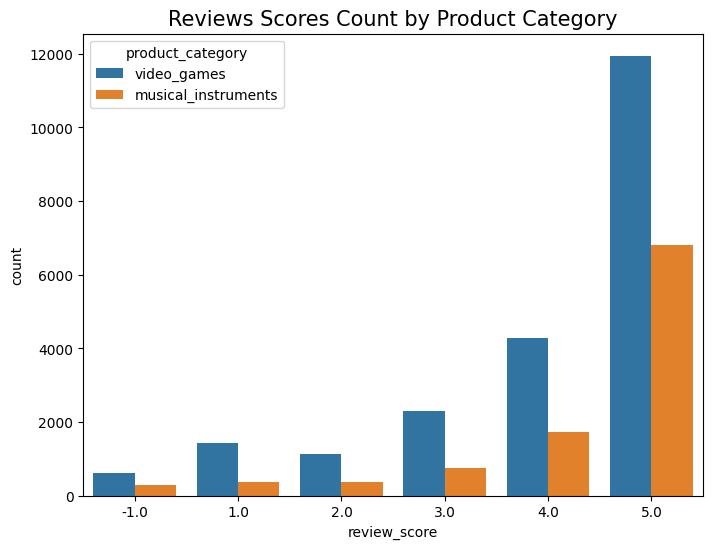

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a matplotlib figure with a size of 8 x 6 inches.
plt.figure(figsize=(8, 6))

# Generate a count plot using the seaborn library.
# It counts the number of occurrences of each value in the 'review_score' column of the df DataFrame and groups by 'product_category'.
sns.countplot(x='review_score', hue='product_category', data=df)

# Set the plot title and title font size.
plt.title("Reviews Scores Count by Product Category", fontsize=15)

# Display the generated plot.
plt.show()

## Upsampling the minority

It is known that Naive bayes is not robust to class imbalance. It could be seen above that the data is little imbalanced. Therefore, class balancing can be done before giving it to the Naive Bayes model for prediction.

Feel free to use 'resample' library from sklearn.

In [7]:
from sklearn.utils import resample
import pandas as pd

# Find the number of samples in the largest class.
max_size = df['review_score'].value_counts().max()

# Create an empty DataFrame to store the balanced data.
df_upsampled = pd.DataFrame()

for score in df['review_score'].unique():
    # Handle each class separately.
    df_score = df[df['review_score'] == score]

    # Use resample to upsample the smaller classes.
    df_score_upsampled = resample(df_score,
                                  replace=True,
                                  n_samples=max_size,
                                  random_state=101)

    # Add the upsampled data to the result DataFrame.
    df_upsampled = pd.concat([df_upsampled, df_score_upsampled])

# Randomly shuffle the balanced dataset.
df_upsampled = df_upsampled.sample(frac=1)

In [8]:
sorted_scores = sorted(df_upsampled['review_score'].unique())

for score in sorted_scores:
    shape = df_upsampled[df_upsampled.review_score == score].shape
    print(f"Review score {score}: {shape}")

Review score -1.0: (19289, 5)
Review score 1.0: (19289, 5)
Review score 2.0: (19289, 5)
Review score 3.0: (19289, 5)
Review score 4.0: (19289, 5)
Review score 5.0: (19289, 5)


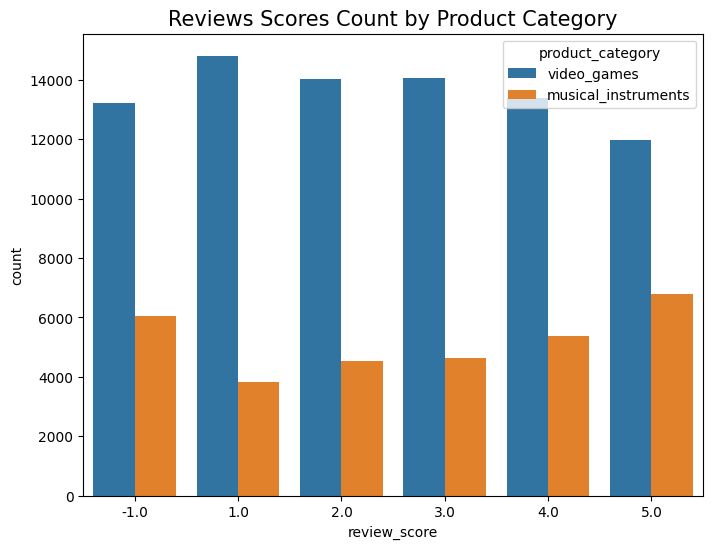

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a matplotlib figure with a size of 8 x 6 inches.
plt.figure(figsize=(8, 6))

# Generate a count plot using the seaborn library.
# It counts the number of occurrences of each value in the 'review_score' column of the df DataFrame and groups by 'product_category'.
sns.countplot(x='review_score', hue='product_category', data=df_upsampled)

# Set the plot title and title font size.
plt.title("Reviews Scores Count by Product Category", fontsize=15)

# Display the generated plot.
plt.show()

##  Use CountVectorizer  from Scikit-learn to transform the review texts into numerical vectors, considering the frequency of each word.

In [10]:
# Keep key information
df_upsampled = df_upsampled[["review_id","text","review_score"]]
df_upsampled

,review_id,text,review_score
25177,product_review_025177,got money worth game 200 hr played go wrong,-1.0
2079,product_review_002079,resi series game well ott hollywood style scar...,2.0
1631,product_review_001631,hi folk ok thing cheap cool cheap item use mon...,1.0
10888,product_review_010888,code redeemed without issue window 10 xbox app...,2.0
9535,product_review_009535,jump b attack might work ne snes snes platform...,2.0
...,...,...,...
26922,product_review_026922,uncomfortable much work adjust buy roc soc one...,2.0
8850,product_review_008850,replaced tuner korean tyler variax 59 work gre...,5.0
19322,product_review_019322,looking get 3 amp flood 2 70w 12 amp big fende...,4.0
5481,product_review_005481,work wii u connect gamecube controller play su...,5.0


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=0.01)
X = vectorizer.fit_transform(df_upsampled['text'])

# Convert the resulting sparse matrix to a DataFrame
# Process data into small batches
batch_size = 1000
num_batches = len(df_upsampled) // batch_size + 1

vectorized_data_list = []

for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, len(df_upsampled))

    # Process text data in batches
    X_batch = vectorizer.transform(df_upsampled['text'].iloc[start_idx:end_idx])
    vectorized_data_list.append(pd.DataFrame(X_batch.toarray(), columns=vectorizer.get_feature_names_out()))

# Merge the results of batch processing
vectorized_data = pd.concat(vectorized_data_list, axis=0, ignore_index=True)
vectorized_data

,10,100,12,15,20,30,360,3d,3rd,40,...,worse,worst,worth,would,wow,wrong,xbox,year,yes,yet
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115729,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115730,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115731,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
115732,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Reset the index to ensure the index is unique
df_upsampled.reset_index(drop=True, inplace=True)
# Merge vectorized data with original data
result_df = pd.concat([df_upsampled, vectorized_data], axis=1)
result_df

,review_id,text,review_score,10,100,12,15,20,30,360,...,worse,worst,worth,would,wow,wrong,xbox,year,yes,yet
0,product_review_019893,poster fantastic list almost every possibility...,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,product_review_001168,good set though lowest string thick enough bou...,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,product_review_013529,good game finished yet step previous game grea...,5.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,1
3,product_review_011293,game suck like 3 combo pokemon like 10 pokemon...,-1.0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,product_review_013587,finally tried lightning return impressed willi...,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115729,product_review_008253,actually great delay maybe little bit understa...,5.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115730,product_review_025513,good ga e short good short,-1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
115731,product_review_013285,best play late night least sun go game mostly ...,3.0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
115732,product_review_008798,bought po computer took home played played not...,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

# Divide training set and test set
train_df, test_df = train_test_split(result_df, test_size=0.2, random_state=42)
train_df

,review_id,text,review_score,10,100,12,15,20,30,360,...,worse,worst,worth,would,wow,wrong,xbox,year,yes,yet
10325,product_review_024017,terrible game need customization want bring ba...,1.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
83370,product_review_021513,button pad barely work roll thumb right button...,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
87544,product_review_018244,battleborn perfect example game love long prol...,1.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
38616,product_review_031309,work fine xbox one,4.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
72814,product_review_023827,work player australia stated item description ...,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76820,product_review_017726,moh series fallen face past two entry rising s...,2.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
110268,product_review_026061,game horrible make cybertron adventure wii loo...,1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
103694,product_review_011136,know many dragon age fan fell love franchise s...,-1.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
860,product_review_029073,work fine obviously expensive cable work,-1.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


# Create BOW model

In [11]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import accuracy_score


# Define the BOW model
class BOWModel(nn.Module):
    def __init__(self, input_dim):
        super(BOWModel, self).__init__()
        self.fc = nn.Linear(input_dim, 1)

    def forward(self, x):
        return self.fc(x)

# Define the BOWDataset class
class BOWDataset(Dataset):
    def __init__(self, df):
        self.df = df

    def __len__(self):
        return len(self.df)

    def __getitem__(self, idx):
        text_vector = torch.tensor(self.df.iloc[idx][3:].astype(float).values, dtype=torch.float32)
        label = torch.tensor(self.df.iloc[idx]['review_score'], dtype=torch.float32)
        return text_vector, label

In [12]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [13]:
device

device(type='cuda')

In [ ]:
# Create BOWDataset instance
train_dataset = BOWDataset(train_df)
test_dataset  = BOWDataset(test_df)

# Create DataLoader
batch_size = 512
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=True, pin_memory=True)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False, pin_memory=True)

In [ ]:
# Initialize model
input_dim = len(result_df.columns) - 3  # remove 'review_score','review_id' ,'text'
model = BOWModel(input_dim).to(device)

# Define loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training model
num_epochs = 10
train_losses = []  # Used to store the training loss for each epoch
train_accuracies = []
test_accuracies = []

In [ ]:
model

BOWModel(
  (fc): Linear(in_features=1004, out_features=1, bias=True)
)

In [ ]:
for epoch in range(num_epochs):
    model.train()
    epoch_loss = 0.0

    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    # Calculate and record the average training loss for each epoch
    average_epoch_loss = epoch_loss / len(train_loader)
    train_losses.append(average_epoch_loss)

    # Calculate accuracy on test set
    model.eval()
    with torch.no_grad():
        train_predictions = []
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predictions = (outputs.squeeze() >= 0.5).float()
            train_predictions.extend(predictions.cpu().numpy())

        train_accuracy = accuracy_score(train_df['review_score'], train_predictions)
        train_accuracies.append(train_accuracy)

        # Calculate accuracy on test set
        test_predictions = []
        for inputs, labels in test_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            predictions = (outputs.squeeze() >= 0.5).float()
            test_predictions.extend(predictions.cpu().numpy())

        test_accuracy = accuracy_score(test_df['review_score'], test_predictions)
        test_accuracies.append(test_accuracy)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {average_epoch_loss:.4f}')


Epoch [1/10], Loss: 6.8797
Epoch [2/10], Loss: 5.6473
Epoch [3/10], Loss: 5.1097
Epoch [4/10], Loss: 4.7810
Epoch [5/10], Loss: 4.5444
Epoch [6/10], Loss: 4.3567
Epoch [7/10], Loss: 4.1986
Epoch [8/10], Loss: 4.0667
Epoch [9/10], Loss: 3.9507
Epoch [10/10], Loss: 3.8522


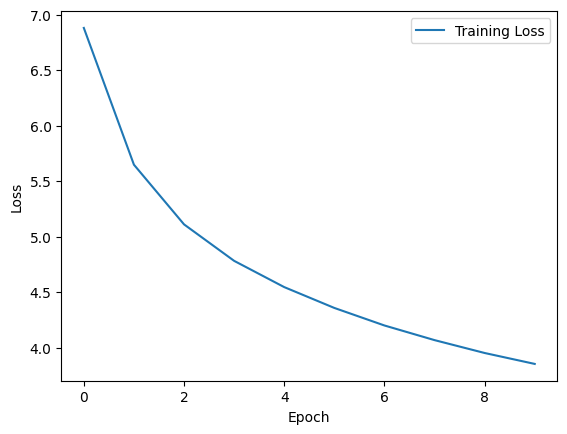

In [ ]:
# Plot training loss curve
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
test_accuracies

[0.108999006350715,
 0.13012485419276795,
 0.13833326132976195,
 0.14606644489566684,
 0.14943621203611698,
 0.15276277703374086,
 0.15440445846113968,
 0.15578692703158076,
 0.15462046917527109,
 0.1564781613168013]

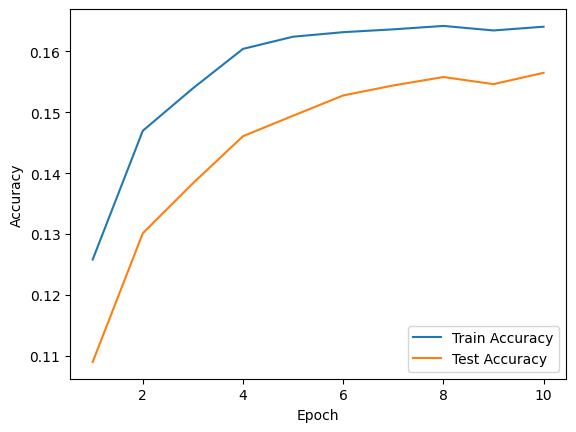

In [ ]:
# Draw an accuracy curve
plt.plot(range(1, num_epochs + 1), train_accuracies, label='Train Accuracy')
plt.plot(range(1, num_epochs + 1), test_accuracies, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## use model

In [ ]:
import torch
import pandas as pd

# input text
new_text = "cool"

# Perform the same preprocessing on new text as during training
cleaned_text = clean_review(new_text)

# Vectorize new text using previous CountVectorizer
vectorized_text = vectorizer.transform([cleaned_text]).toarray()

# Convert vectorized text data to PyTorch Tensor
input_tensor = torch.tensor(vectorized_text, dtype=torch.float32).to(device)

# Forecasting using the BOW model
with torch.no_grad():
    output = model(input_tensor)
    predicted_score = output.item()

print(f"The predicted score for the new text is: {predicted_score}")

The predicted score for the new text is: 1.6385974884033203


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ivyzhou/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Prepare for BERT model

In [14]:
# before, we have df_upsampled = df_upsampled[["review_id","text","review_score"]] which contains
# the key information from the original data
df_upsampled

,review_id,text,review_score
25177,product_review_025177,got money worth game 200 hr played go wrong,-1.0
2079,product_review_002079,resi series game well ott hollywood style scar...,2.0
1631,product_review_001631,hi folk ok thing cheap cool cheap item use mon...,1.0
10888,product_review_010888,code redeemed without issue window 10 xbox app...,2.0
9535,product_review_009535,jump b attack might work ne snes snes platform...,2.0
...,...,...,...
26922,product_review_026922,uncomfortable much work adjust buy roc soc one...,2.0
8850,product_review_008850,replaced tuner korean tyler variax 59 work gre...,5.0
19322,product_review_019322,looking get 3 amp flood 2 70w 12 amp big fende...,4.0
5481,product_review_005481,work wii u connect gamecube controller play su...,5.0


In [15]:
# To prepare the data for the BERT model, we need to tokenize the text
from transformers import BertTokenizer
import torch
import torch.nn.functional as F
from sklearn.preprocessing import LabelEncoder

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

# Initialize BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Adjust label encoding for review scores ranging from -1 to 5
label_encoder = LabelEncoder()
df_upsampled['encoded_labels'] = label_encoder.fit_transform(df_upsampled['review_score'] + 1)

# Set batch size
batch_size = 500
max_seq_length = 64
num_batches = len(df_upsampled) // batch_size + 1

# Initialize lists to store batched tensors
input_ids_list, attention_masks_list, segment_ids_list, labels_list = [], [], [], []

# Process data into batches
for i in range(num_batches):
    start_idx = i * batch_size
    end_idx = min((i + 1) * batch_size, len(df_upsampled))

    # Tokenize text data in batches
    tokenized_data_batch = df_upsampled['text'].iloc[start_idx:end_idx].apply(
        lambda x: tokenizer(x, return_tensors='pt', padding='max_length', truncation=True, max_length=max_seq_length)
    )

    # Concatenate tokenized tensors into batched tensors
    input_ids_batch = torch.cat([tensor['input_ids'] for tensor in tokenized_data_batch])
    attention_masks_batch = torch.cat([tensor['attention_mask'] for tensor in tokenized_data_batch])
    segment_ids_batch = torch.cat([tensor.get('token_type_ids', torch.zeros_like(tensor['input_ids'])) for tensor in tokenized_data_batch])

    # Extract labels for the current batch
    labels_batch = torch.tensor(df_upsampled['encoded_labels'].iloc[start_idx:end_idx].values)

    # Append batched tensors to lists
    input_ids_list.append(input_ids_batch)
    attention_masks_list.append(attention_masks_batch)
    segment_ids_list.append(segment_ids_batch)
    labels_list.append(labels_batch)

# Concatenate lists into final tensors
input_ids = torch.cat(input_ids_list)
attention_masks = torch.cat(attention_masks_list)
segment_ids = torch.cat(segment_ids_list)
labels = torch.cat(labels_list)

# Print shapes of the tensors
print("Input IDs shape:", input_ids.shape)
print("Attention Masks shape:", attention_masks.shape)
print("Segment IDs shape:", segment_ids.shape)
print("Labels shape:", labels.shape)


tokenizer_config.json:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

Input IDs shape: torch.Size([115734, 64])
Attention Masks shape: torch.Size([115734, 64])
Segment IDs shape: torch.Size([115734, 64])
Labels shape: torch.Size([115734])


# Create the BERT model



In [16]:
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader
from transformers import BertForSequenceClassification, AdamW
from sklearn.model_selection import train_test_split

# Define the BERT model architecture for sequence classification
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=6)

# Split the data into training and validation sets
train_inputs, val_inputs, train_labels, val_labels = train_test_split(input_ids, labels, test_size=0.2, random_state=42)
train_masks, val_masks, _, _ = train_test_split(attention_masks, labels, test_size=0.2, random_state=42)
train_segments, val_segments, _, _ = train_test_split(segment_ids, labels, test_size=0.2, random_state=42)

# Convert data to PyTorch datasets
train_dataset = TensorDataset(train_inputs, train_masks, train_segments, train_labels)
val_dataset = TensorDataset(val_inputs, val_masks, val_segments, val_labels)

# Set batch size and create data loaders
batch_size = 10
train_dataloader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

# Define optimizer and loss function
optimizer = AdamW(model.parameters(), lr=1e-5)
criterion = nn.CrossEntropyLoss()


model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [17]:
import torch.nn.functional as F

# Define optimizer and loss function
optimizer = AdamW(model.parameters(), lr=1e-5)

# Move optimizer state to the same device as the model
optimizer_state = optimizer.state_dict()
for key, value in optimizer_state["state"].items():
    optimizer_state["state"][key] = {k: v.to(device) for k, v in value.items()}
optimizer.load_state_dict(optimizer_state)

# Training loop
num_epochs = 5

# Move the model to the CUDA device if available
model.to(device)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0

    for batch in train_dataloader:
        input_ids, attention_masks, segment_ids, labels = batch

        # Move tensors to the CUDA device if available
        input_ids, attention_masks, segment_ids, labels = input_ids.to(device), attention_masks.to(device), segment_ids.to(device), labels.to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_masks, token_type_ids=segment_ids, labels=labels)

        # Extract logits from the output
        logits = outputs.logits

        # Calculate loss
        loss = criterion(logits, labels)

        total_loss += loss.item()

        # Backward pass
        loss.backward()
        optimizer.step()

    average_loss = total_loss / len(train_dataloader)
    print(f"Epoch {epoch + 1}/{num_epochs}, Average Training Loss: {average_loss}")

    # Save the model and optimizer state at the end of each epoch
    checkpoint = {
        'epoch': epoch + 1,
        'model_state_dict': model.state_dict(),
        'optimizer_state_dict': optimizer.state_dict(),
        'loss': average_loss
    }

    torch.save(checkpoint, f'model_checkpoint_epoch_{epoch + 1}.pt')


Epoch 1/5, Average Training Loss: 1.0364915886568977
Epoch 2/5, Average Training Loss: 0.4111916956687206
Epoch 3/5, Average Training Loss: 0.258688829345002
Epoch 4/5, Average Training Loss: 0.18544839651807724
Epoch 5/5, Average Training Loss: 0.14779031098810863


In [19]:
# Evaluation
model.eval()
val_loss = 0
correct_predictions = 0

with torch.no_grad():
    for batch in val_dataloader:
        input_ids, attention_masks, segment_ids, labels = batch
        # Move tensors to the CUDA device if available
        input_ids, attention_masks, segment_ids, labels = input_ids.to(device), attention_masks.to(device), segment_ids.to(device), labels.to(device)

        outputs = model(input_ids, attention_mask=attention_masks, token_type_ids=segment_ids, labels=labels)
        val_loss += outputs.loss.item()

        logits = outputs.logits
        predictions = torch.argmax(logits, dim=1)
        correct_predictions += (predictions == labels).sum().item()

average_val_loss = val_loss / len(val_dataloader)
accuracy = correct_predictions / len(val_dataset)

print(f"Validation Loss: {average_val_loss}, Validation Accuracy: {accuracy}")


Validation Loss: 0.18545045326555654, Validation Accuracy: 0.9411586814706009


# Use the BERT model to predict new text

In [22]:
from transformers import BertTokenizer
import torch

# Assuming tokenizer and model are already initialized
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Input text
new_text = "cool"

# Tokenize and convert to tensors
tokenized_data = tokenizer(new_text, return_tensors='pt', padding='max_length', truncation=True, max_length=128)
input_ids = tokenized_data['input_ids'].to(device)
attention_mask = tokenized_data['attention_mask'].to(device)
token_type_ids = tokenized_data.get('token_type_ids', torch.zeros_like(input_ids)).to(device)

# Make prediction
model.eval()
with torch.no_grad():
    outputs = model(input_ids, attention_mask=attention_mask, token_type_ids=token_type_ids)

# Assuming the model is trained for classification
predicted_scores = torch.softmax(outputs.logits, dim=1).squeeze().cpu().numpy()

# Interpret the predictions
predicted_label = torch.argmax(outputs.logits).item()

print(f"The predicted score for the new text is: {predicted_label}")

The predicted score for the new text is: 5
